✅ Loading dataset... Please wait

✅ Model Performance:
Random Forest Accuracy: 0.90625
Gradient Boosting Accuracy: 0.8993055555555556


C:\Users\randy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:17:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9305555555555556

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

       angry       0.97      0.92      0.95        79
        calm       0.87      1.00      0.93        69
     disgust       0.97      0.93      0.95        84
     fearful       0.95      0.93      0.94        80
       happy       0.93      0.95      0.94        82
     neutral       0.94      0.71      0.81        42
         sad       0.88      0.97      0.92        61
   surprised       0.93      0.95      0.94        79

    accuracy                           0.93       576
   macro avg       0.93      0.92      0.92       576
weighted avg       0.93      0.93      0.93       576



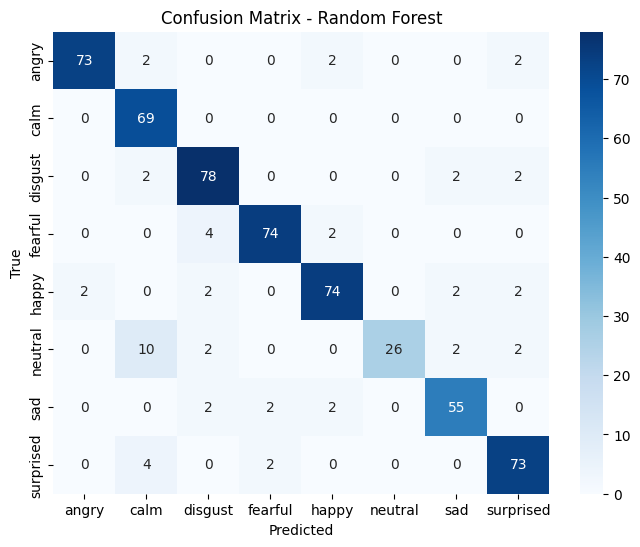

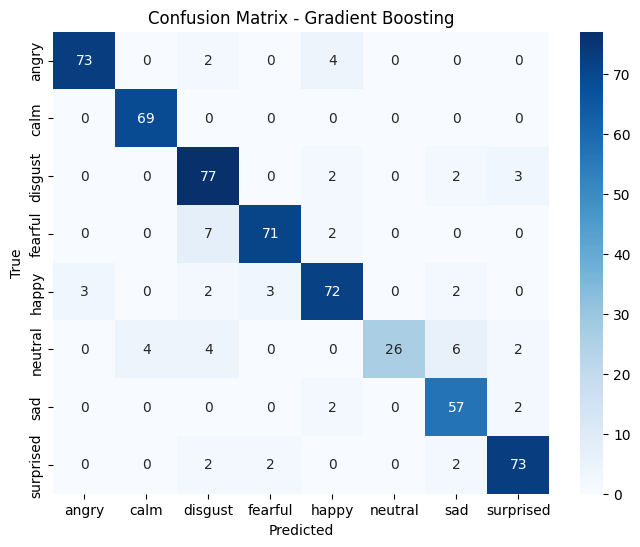

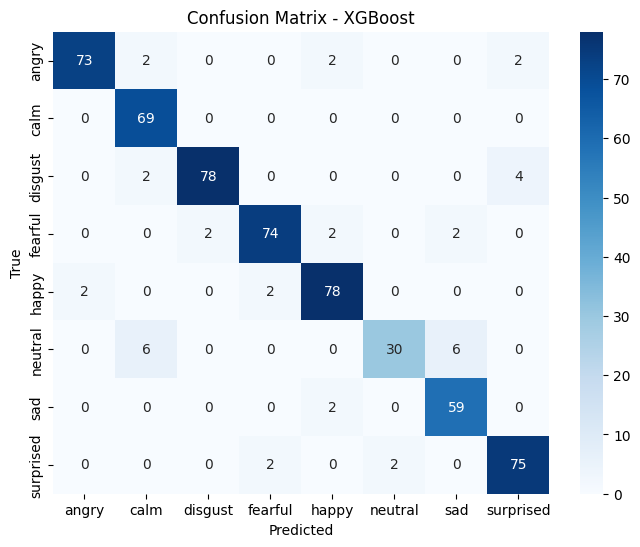

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

DATA_PATH = r"C:\archive"

emotions = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}

X, y = [], []

if not os.path.exists(DATA_PATH):
    print(f"❌ Error: The directory {DATA_PATH} does not exist.")
else:
    print("✅ Loading dataset... Please wait")

    for root, _, files in os.walk(DATA_PATH):
        for file in files:
            if file.endswith(".wav"):
                try:
                    emotion = emotions[file.split("-")[2]]

                    audio, sr = librosa.load(os.path.join(root, file), sr=None)

                    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                    mfcc_scaled = np.mean(mfcc.T, axis=0)

                    X.append(mfcc_scaled)
                    y.append(emotion)
                except Exception as e:
                    print(f"⚠️ Skipping {file}: {e}")

    X = np.array(X)
    y = np.array(y)

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
    }

    predictions = {}

    print("\n✅ Model Performance:")
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        predictions[name] = preds
        print(f"{name} Accuracy:", accuracy_score(y_test, preds))

    print("\n📊 Classification Report (XGBoost):")
    print(classification_report(y_test, predictions["XGBoost"], target_names=le.classes_))

    for name, preds in predictions.items():
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"Confusion Matrix - {name}")
        plt.show()


✅ Loading dataset... Please wait
✅ Loaded 7442 audio files


C:\Users\randy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Model Performance:
Random Forest Accuracy: 0.45668233713901946
Gradient Boosting Accuracy: 0.4728005372733378
XGBoost Accuracy: 0.4956346541302888

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

       angry       0.66      0.71      0.68       235
     disgust       0.45      0.48      0.46       269
     fearful       0.41      0.36      0.39       239
       happy       0.42      0.37      0.39       260
     neutral       0.44      0.48      0.46       224
         sad       0.58      0.58      0.58       262

    accuracy                           0.50      1489
   macro avg       0.49      0.50      0.49      1489
weighted avg       0.49      0.50      0.49      1489



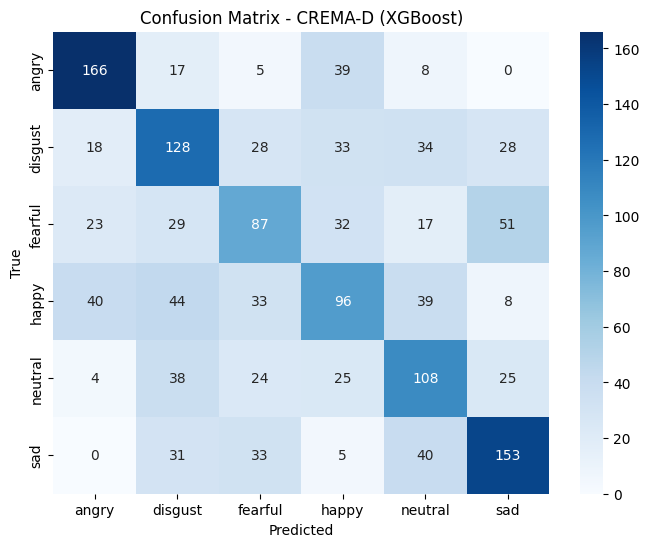

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


DATA_PATH = r"C:\crema-d\AudioWAV"

emotion_map = {
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fearful",
    "HAP": "happy",
    "NEU": "neutral",
    "SAD": "sad"
}

X, y = [], []

if not os.path.exists(DATA_PATH):
    print(f"❌ Error: The directory {DATA_PATH} does not exist.")
else:
    print("✅ Loading dataset... Please wait")

    count = 0
    for file in os.listdir(DATA_PATH):
        if file.endswith(".wav"):
            parts = file.split("_")
            if len(parts) >= 3:
                emotion_code = parts[2]  
                if emotion_code in emotion_map:
                    emotion = emotion_map[emotion_code]

                    try:
                        audio_path = os.path.join(DATA_PATH, file)
                        audio, sr = librosa.load(audio_path, sr=None)

                        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                        mfcc_scaled = np.mean(mfcc.T, axis=0)

                        X.append(mfcc_scaled)
                        y.append(emotion)
                        count += 1
                    except Exception as e:
                        print(f"⚠️ Skipping {file}: {e}")

    print(f"✅ Loaded {count} audio files")

    X = np.array(X)
    y = np.array(y)

    if len(X) == 0 or len(y) == 0:
        print("❌ Error: No audio data loaded. Check your DATA_PATH and file names.")
    else:
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42
        )

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # 1. Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)

        # 2. Gradient Boosting
        gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
        gb.fit(X_train, y_train)
        gb_pred = gb.predict(X_test)

        # 3. XGBoost
        xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
        xgb.fit(X_train, y_train)
        xgb_pred = xgb.predict(X_test)

        # Evaluation
        print("\n✅ Model Performance:")
        print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
        print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
        print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

        print("\n📊 Classification Report (XGBoost):")
        print(classification_report(y_test, xgb_pred, target_names=le.classes_))

        cm = confusion_matrix(y_test, xgb_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=le.classes_,
                    yticklabels=le.classes_)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix - CREMA-D (XGBoost)")
        plt.show()
